# Рабочая тетрадь 8

## Петренко Егор, ББСО-01-21

### Задание 1

Дан массив данных  𝑋 = 𝑛𝑝.𝑎𝑟𝑟𝑎𝑦([[5,3],      [10,15],      [15,12],      [24,10],      [30,45],      [85,70],      [71,80],      [60,78],      [55,52],      [80,91],]) Требуется провести кластерный анализ данных методом k-средних. Поэкспериментируйте с количеством кластеров.

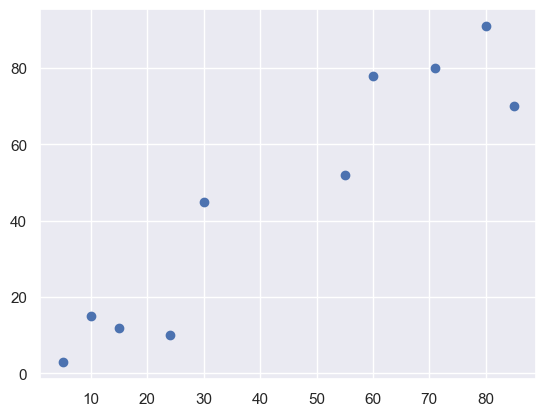

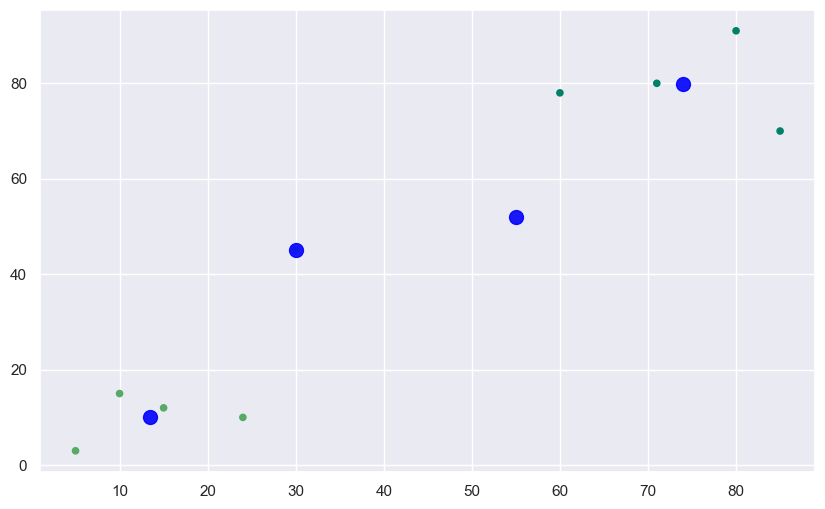

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
from sklearn.cluster import KMeans
x = np.array([[5,3], [10,15], [15,12], [24,10], [30,45], [85,70], [71,80], [60,78], [55,52], [80,91],])
X = x[:, 0]
Y = x[:, 1]

plt.scatter(X, Y)
plt.show()

kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, s = 20,c = y_kmeans, cmap = 'summer', alpha=1)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha=0.9)
plt.show()

### Задание 2
Выполните кластеризацию для набора данных ирисов Фишера. Выполните
предсказания для модели. Поэкспериментируйте с количеством кластеров.

In [99]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris_df.iloc[:, :4]

kmeans = KMeans(n_clusters = 3)
y_pred = kmeans.fit_predict(X)

iris.target

from sklearn.metrics import accuracy_score
accuracy_score(iris.target, y_pred)

0.8933333333333333

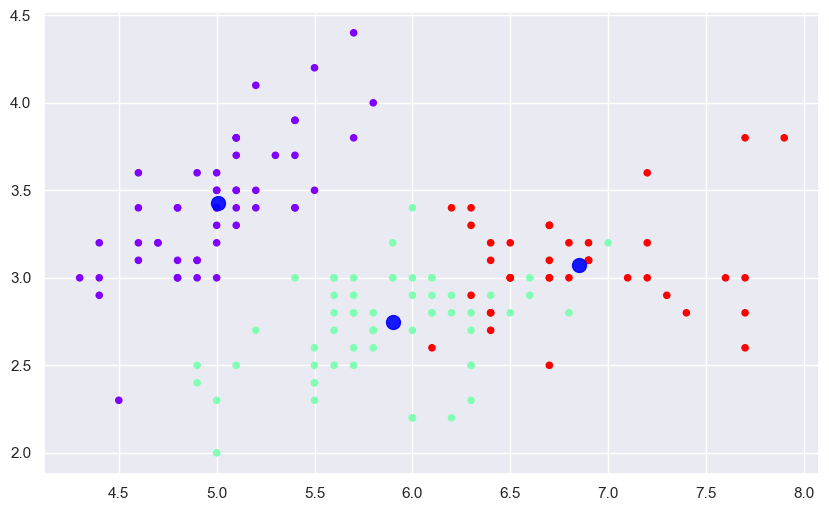

In [100]:
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:,0],X.iloc[:,1],  s = 20,c = y_pred, cmap = 'rainbow', alpha=1)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha=0.9)
plt.show()

### Задание 3

Выполните иерархическую кластеризацию для набора данных об
ирисах Фишера. При этом необходимо использовать любые два признака
(всего их четыре).

In [105]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris_df.iloc[:, :2].values
X[:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

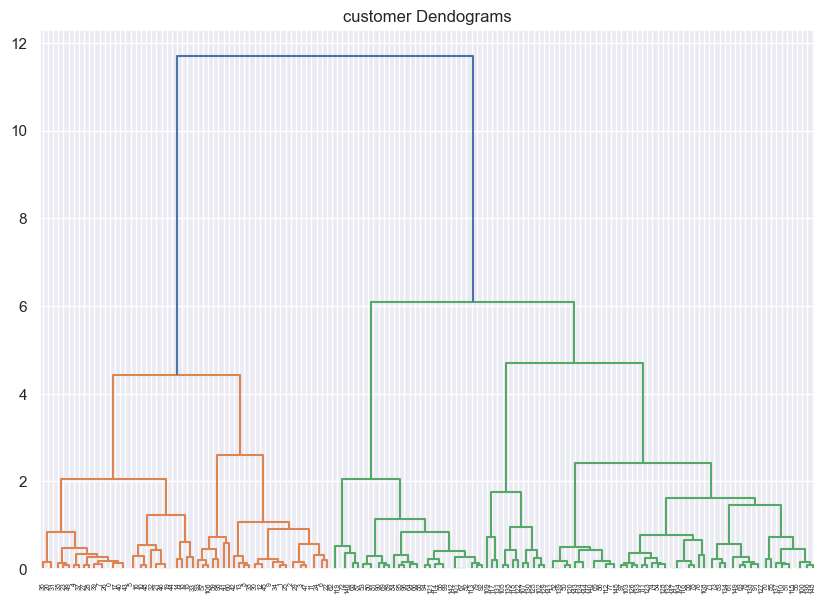

In [102]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("customer Dendograms")
dend = shc.dendrogram(shc.linkage(X, method = 'ward'))

In [103]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0], dtype=int64)

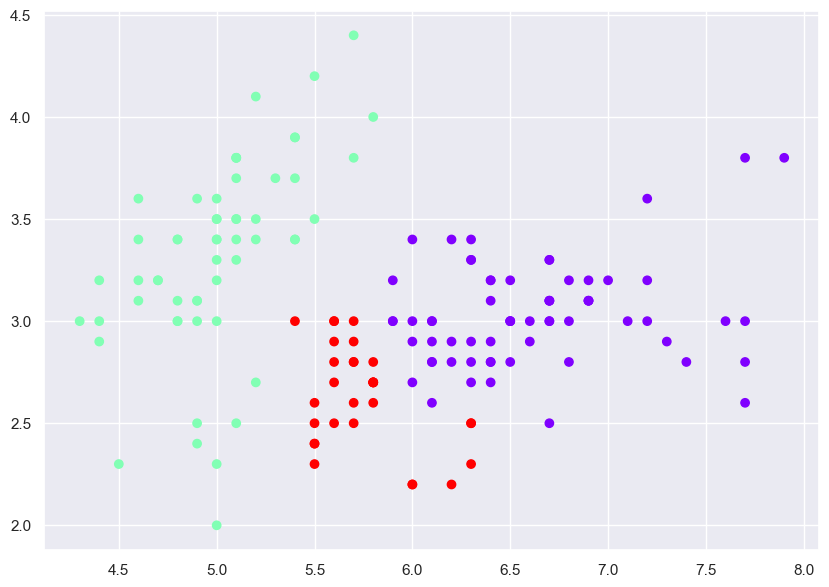

In [104]:
plt.figure(figsize = (10,7))
plt.scatter(X[:, 0], X[:, 1], c = cluster.labels_, cmap = 'rainbow')
plt.show()